# Import Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
from pysal.explore import esda
from esda.moran import Moran, Moran_Local
from pysal.lib import weights
from shapely.ops import unary_union

/opt/conda/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:38: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/opt/conda/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:164: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/opt/conda/lib/python3.11/site-packages/libpysal/cg/alpha_shapes.py:198: NumbaDeprecationWarning: The 'nopython' keyw

# Load Data

In [2]:
gdf_lsoa = gpd.read_file("Data/manchester_lsoa/manchester_lsoa.shp")
gdf_supply_demand = gpd.read_file("Data/fixed_supply_demand_sorted/pt_supply_demand_sorted.shp")
drt_zones = gpd.read_file("Data/LocalLink_MapData/SHP-format/Locallink_Areas.shp")
outline = gpd.read_file("Data/manchester_lsoa/manchester_outline.shp")

In [3]:
gdf_supply_demand

,lsoa21cd,lsoa21nm,nearest_st,bus_stops_,pt_supply,women_perc,elderly_pe,child_perc,pop_dens_n,dis_nc_nor,deprived_p,pt_demand,pt_supply_,pt_demand_,demand_sup,diff_rank,geometry
0,E01005610,Salford 034C,0.033137,0.078302,0.055720,0.776303,0.820214,0.195232,0.012601,0.694277,0.754513,0.542190,0.100043,0.940230,0.840187,1,"POLYGON ((382382.589 399864.740, 382401.425 39..."
1,E01005210,Manchester 019C,0.017069,0.207636,0.112353,0.846960,0.869194,0.163253,0.003561,0.785691,0.740958,0.568269,0.202717,1.000000,0.797283,2,"POLYGON ((384153.632 396891.980, 384161.000 39..."
2,E01005918,Stockport 014D,0.008930,0.063355,0.036143,0.087678,0.352856,0.415174,0.011102,0.995911,0.995982,0.476451,0.064550,0.789565,0.725015,3,"POLYGON ((390022.732 391318.291, 390000.000 39..."
3,E01005281,Manchester 026B,0.007067,0.074958,0.041013,0.872976,0.962122,0.033302,0.009474,0.510101,0.406356,0.465722,0.073380,0.764976,0.691597,4,"POLYGON ((386220.184 394924.368, 386227.904 39..."
4,E01005754,Stockport 004B,0.035268,0.064255,0.049762,0.122807,0.234103,0.418846,0.012186,0.978436,0.952437,0.453136,0.089241,0.736131,0.646890,5,"POLYGON ((390607.548 393101.450, 390611.942 39..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,E01034131,Manchester 060E,0.233278,0.305189,0.269234,0.525498,0.497090,0.040291,0.004520,0.228268,0.042877,0.223090,0.487138,0.208901,-0.278236,1698,"POLYGON ((383426.354 397692.053, 383431.000 39..."
1698,E01032909,Salford 033F,0.026146,0.654672,0.340409,0.663599,0.637577,0.022589,0.003487,0.174130,0.103250,0.267439,0.616178,0.310541,-0.305637,1699,"POLYGON ((383832.622 398865.622, 383832.250 39..."
1699,E01033997,Salford 037C,0.490598,0.253100,0.371849,0.476893,0.461002,0.111811,0.016386,0.186978,0.230879,0.247325,0.673177,0.264443,-0.408734,1700,"POLYGON ((381267.589 397583.407, 381275.086 39..."
1700,E01033983,Salford 021I,1.000000,0.104236,0.552118,0.332498,0.335244,0.316318,0.039624,0.396620,0.461382,0.313614,1.000000,0.416368,-0.583632,1701,"POLYGON ((379749.000 398692.000, 379760.326 39..."


Text(0.5, 1.0, 'DRT Demand Index Distribution')

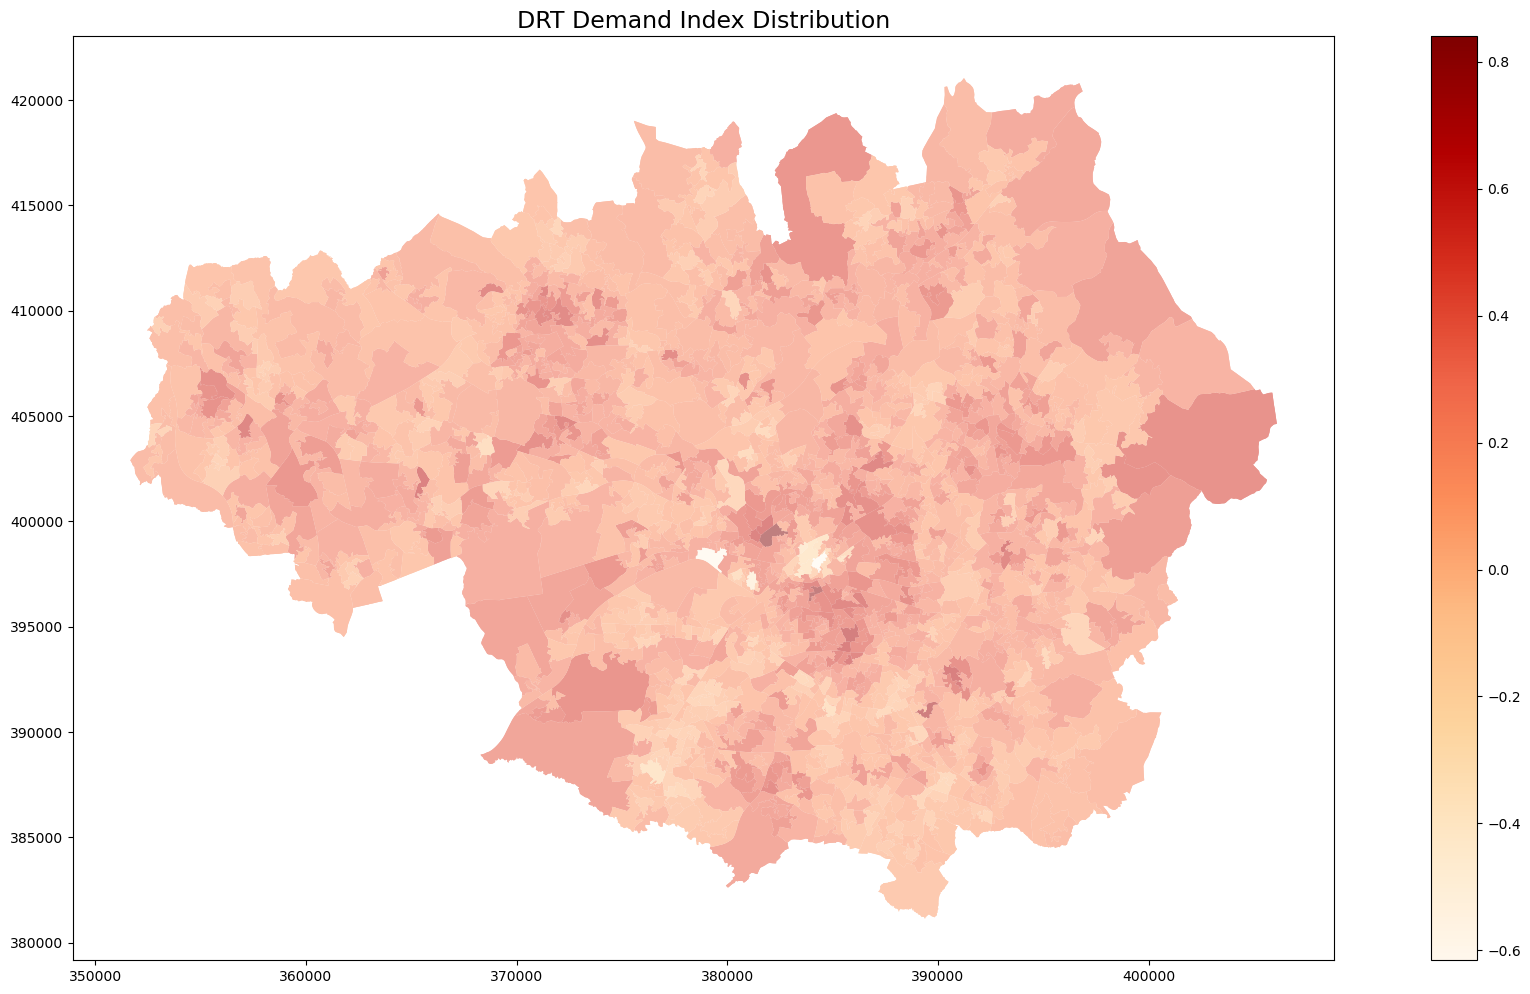

In [4]:
## Set up the plots
fig, ax = plt.subplots(1,1 , figsize=(25, 12))

## Plot Supply Demand Index Map
gdf_supply_demand.plot(ax=ax, column="demand_sup", cmap="OrRd", legend=True)
gdf_lsoa.plot(ax=ax, facecolor="white", alpha=0.5, edgecolor="none", linewidth=0.5)
ax.set_title("DRT Demand Index Distribution", fontsize=17)
#ax.axis("off")

## Global Moran's I

In [5]:
## Defining Weight
w = weights.Queen.from_dataframe(gdf_supply_demand)
w.transform = "r"

In [6]:
## Calculate Global Moran's I
y = gdf_supply_demand["demand_sup"].values
moran = Moran(y,w)

print(f"Moran's I: {moran.I}")
print(f"Expected value: {moran.EI}")
print(f"Variance: {moran.VI_norm}")
print(f"Z-score: {moran.z_norm}")
print(f"P-value: {moran.p_norm}")

Moran's I: 0.40408703445506117
Expected value: -0.0005878894767783657
Variance: 0.0002066388787452283
Z-score: 28.151418005758224
P-value: 2.3024905026781064e-174


## Local Moran's I

In [7]:
## Calculate Local Moran's I for each LSOA
moran_local = Moran_Local(y,w)

## Create new column to store the local moran's I value and its p_value
gdf_supply_demand["local_moran"] = moran_local.Is
gdf_supply_demand["local_moran_p"] = moran_local.p_sim

In [8]:
gdf_supply_demand

,lsoa21cd,lsoa21nm,nearest_st,bus_stops_,pt_supply,women_perc,elderly_pe,child_perc,pop_dens_n,dis_nc_nor,deprived_p,pt_demand,pt_supply_,pt_demand_,demand_sup,diff_rank,geometry,local_moran,local_moran_p
0,E01005610,Salford 034C,0.033137,0.078302,0.055720,0.776303,0.820214,0.195232,0.012601,0.694277,0.754513,0.542190,0.100043,0.940230,0.840187,1,"POLYGON ((382382.589 399864.740, 382401.425 39...",5.618820,0.001
1,E01005210,Manchester 019C,0.017069,0.207636,0.112353,0.846960,0.869194,0.163253,0.003561,0.785691,0.740958,0.568269,0.202717,1.000000,0.797283,2,"POLYGON ((384153.632 396891.980, 384161.000 39...",6.284658,0.001
2,E01005918,Stockport 014D,0.008930,0.063355,0.036143,0.087678,0.352856,0.415174,0.011102,0.995911,0.995982,0.476451,0.064550,0.789565,0.725015,3,"POLYGON ((390022.732 391318.291, 390000.000 39...",-0.634700,0.393
3,E01005281,Manchester 026B,0.007067,0.074958,0.041013,0.872976,0.962122,0.033302,0.009474,0.510101,0.406356,0.465722,0.073380,0.764976,0.691597,4,"POLYGON ((386220.184 394924.368, 386227.904 39...",5.505007,0.001
4,E01005754,Stockport 004B,0.035268,0.064255,0.049762,0.122807,0.234103,0.418846,0.012186,0.978436,0.952437,0.453136,0.089241,0.736131,0.646890,5,"POLYGON ((390607.548 393101.450, 390611.942 39...",2.912618,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697,E01034131,Manchester 060E,0.233278,0.305189,0.269234,0.525498,0.497090,0.040291,0.004520,0.228268,0.042877,0.223090,0.487138,0.208901,-0.278236,1698,"POLYGON ((383426.354 397692.053, 383431.000 39...",2.807834,0.043
1698,E01032909,Salford 033F,0.026146,0.654672,0.340409,0.663599,0.637577,0.022589,0.003487,0.174130,0.103250,0.267439,0.616178,0.310541,-0.305637,1699,"POLYGON ((383832.622 398865.622, 383832.250 39...",2.561438,0.054
1699,E01033997,Salford 037C,0.490598,0.253100,0.371849,0.476893,0.461002,0.111811,0.016386,0.186978,0.230879,0.247325,0.673177,0.264443,-0.408734,1700,"POLYGON ((381267.589 397583.407, 381275.086 39...",1.961849,0.191
1700,E01033983,Salford 021I,1.000000,0.104236,0.552118,0.332498,0.335244,0.316318,0.039624,0.396620,0.461382,0.313614,1.000000,0.416368,-0.583632,1701,"POLYGON ((379749.000 398692.000, 379760.326 39...",-1.131129,0.302


In [9]:
## Set significance level
significance_level = 0.05

## Identify significant clusters and outliers
gdf_supply_demand["significant"] = gdf_supply_demand["local_moran_p"] < significance_level

## Differentiate between high-high, low-low, high-low, and low-high clusters
gdf_supply_demand["cluster_type"] = "Not Significant"
gdf_supply_demand.loc[(gdf_supply_demand["significant"]) & (gdf_supply_demand["local_moran"] > 0) & (y > y.mean()), "cluster_type"] = "High-High"
gdf_supply_demand.loc[(gdf_supply_demand["significant"]) & (gdf_supply_demand["local_moran"] > 0) & (y < y.mean()), "cluster_type"] = "Low-Low"
gdf_supply_demand.loc[(gdf_supply_demand["significant"]) & (gdf_supply_demand["local_moran"] < 0) & (y > y.mean()), "cluster_type"] = "High-Low"
gdf_supply_demand.loc[(gdf_supply_demand["significant"]) & (gdf_supply_demand["local_moran"] < 0) & (y < y.mean()), "cluster_type"] = "Low-High"

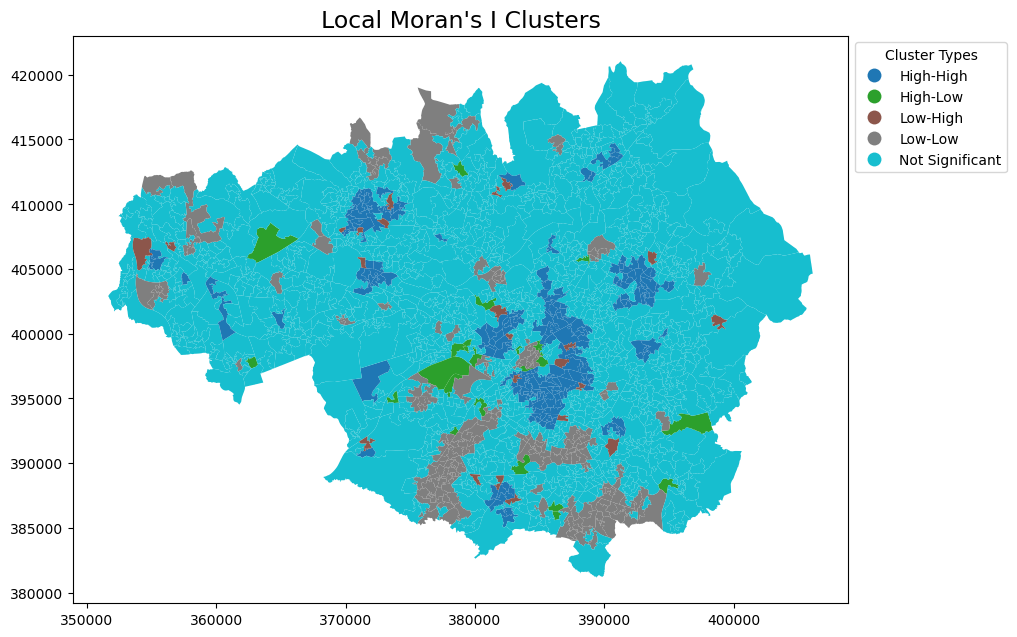

In [10]:
# Plot the clusters
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf_supply_demand.plot(ax=ax, 
                       column="cluster_type", 
                       categorical=True, legend=True,
                       legend_kwds={"bbox_to_anchor": (1, 1), 
                                    "loc": "upper left"})

ax.get_legend().set_title("Cluster Types")
#ax.axis("off")
#drt_zones.plot(ax=ax, facecolor="yellow", alpha=0.5)
plt.title("Local Moran\'s I Clusters", fontsize=17)
plt.show()

## Extract High-High Areas

In [11]:
## Filter only High-High areas
high_high = gdf_supply_demand[gdf_supply_demand["cluster_type"] == "High-High"]

In [12]:
## Merge neighboring High-High areas into single polygon
high_high_union = high_high.geometry.unary_union

## Create a new gdf from the merged High-High areas
high_high_zones = gpd.GeoDataFrame(geometry=[high_high_union], crs=gdf_supply_demand.crs)

In [13]:
## Export to shapefile (still in LSOAs)
high_high.to_file("Data/fixed_output/proposed_zones/fixed_high_high_lsoa.shp")

## Export to shapefile (merged into one big polygon)
high_high_zones.to_file("Data/fixed_output/proposed_zones/fixed_high_high.shp")

/tmp/ipykernel_2369/1352836038.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  high_high.to_file("Data/fixed_output/proposed_zones/fixed_high_high_lsoa.shp")


# Evaluating the Proposed Zones

In [14]:
## Then the shapefile was processed in QGIS, where the areas within the high_high clusters will be grouped and labeled into 9 zones
## The current zones was also processed in QGIS, where the lsoa within the zones were extracted

proposed_zones = gpd.read_file("Data/fixed_output/proposed_zones/fixed_proposed_zones.shp")
current_zones = gpd.read_file("Data/Output/lsoa_locallink_zones.shp")

<Axes: >

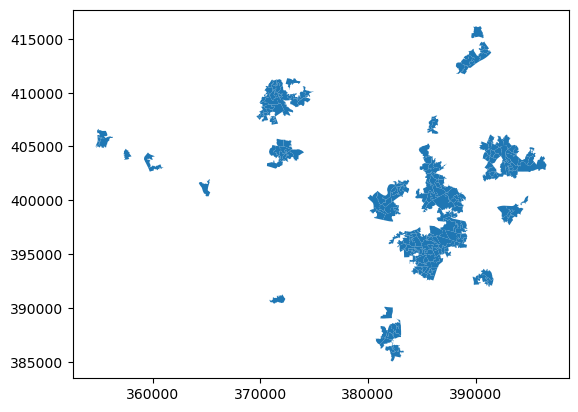

In [15]:
proposed_zones.plot()

<Axes: >

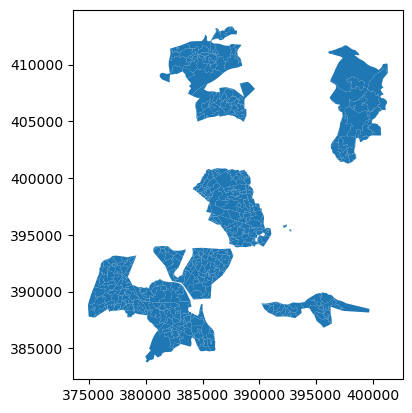

In [16]:
current_zones.plot()

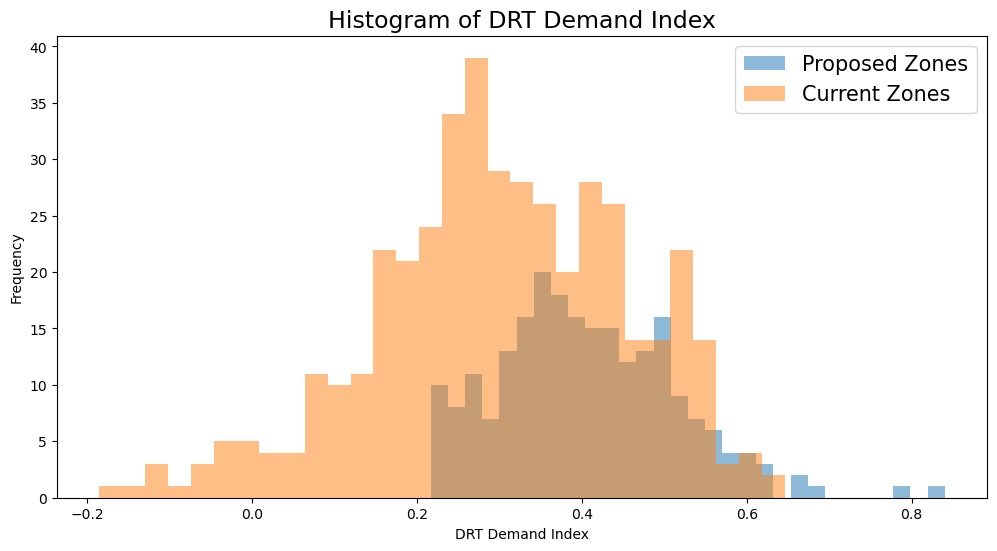

In [17]:
## Plot histograms
plt.figure(figsize=(12, 6))

proposed_zones["demand_sup"].hist(bins=30, alpha=0.5, label="Proposed Zones")
current_zones["demand_sup"].hist(bins=30, alpha=0.5, label="Current Zones")

plt.xlabel("DRT Demand Index")
plt.ylabel("Frequency")
plt.legend(loc="upper right", fontsize=15)
plt.grid(False)
plt.title("Histogram of DRT Demand Index", fontsize=17)
plt.show()

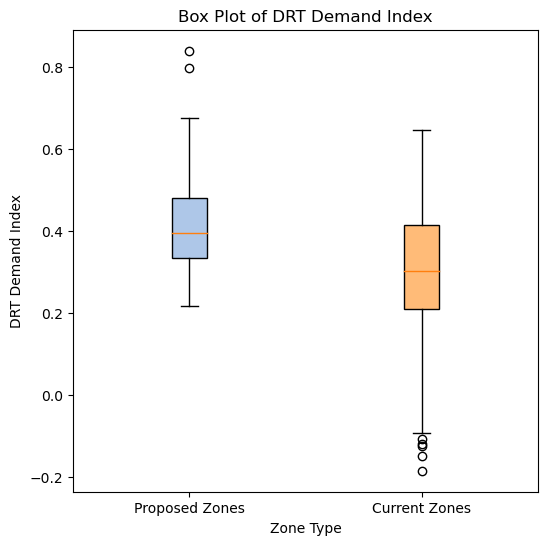

In [18]:
## Boxplot
boxplot_data = [proposed_zones["demand_sup"], current_zones["demand_sup"]]

colors = ['#aec7e8', '#ffbb78']

plt.figure(figsize=(6, 6))
bplot = plt.boxplot(boxplot_data, labels=["Proposed Zones", "Current Zones"], patch_artist=True)

for patch, color in zip(bplot["boxes"], colors):
                        patch.set_facecolor(color)
    
plt.title("Box Plot of DRT Demand Index")
plt.xlabel("Zone Type")
plt.ylabel("DRT Demand Index")

plt.show()

In [19]:
proposed_zones.demand_sup.describe()

count    228.000000
mean       0.407886
std        0.108989
min        0.216751
25%        0.332811
50%        0.395324
75%        0.481647
max        0.840332
Name: demand_sup, dtype: float64

In [20]:
current_zones.demand_sup.describe()

count    429.000000
mean       0.302603
std        0.153060
min       -0.185588
25%        0.209793
50%        0.303161
75%        0.414788
max        0.645871
Name: demand_sup, dtype: float64

Text(0.5, 1.0, 'Proposed DRT Zones in Greater Manchester')

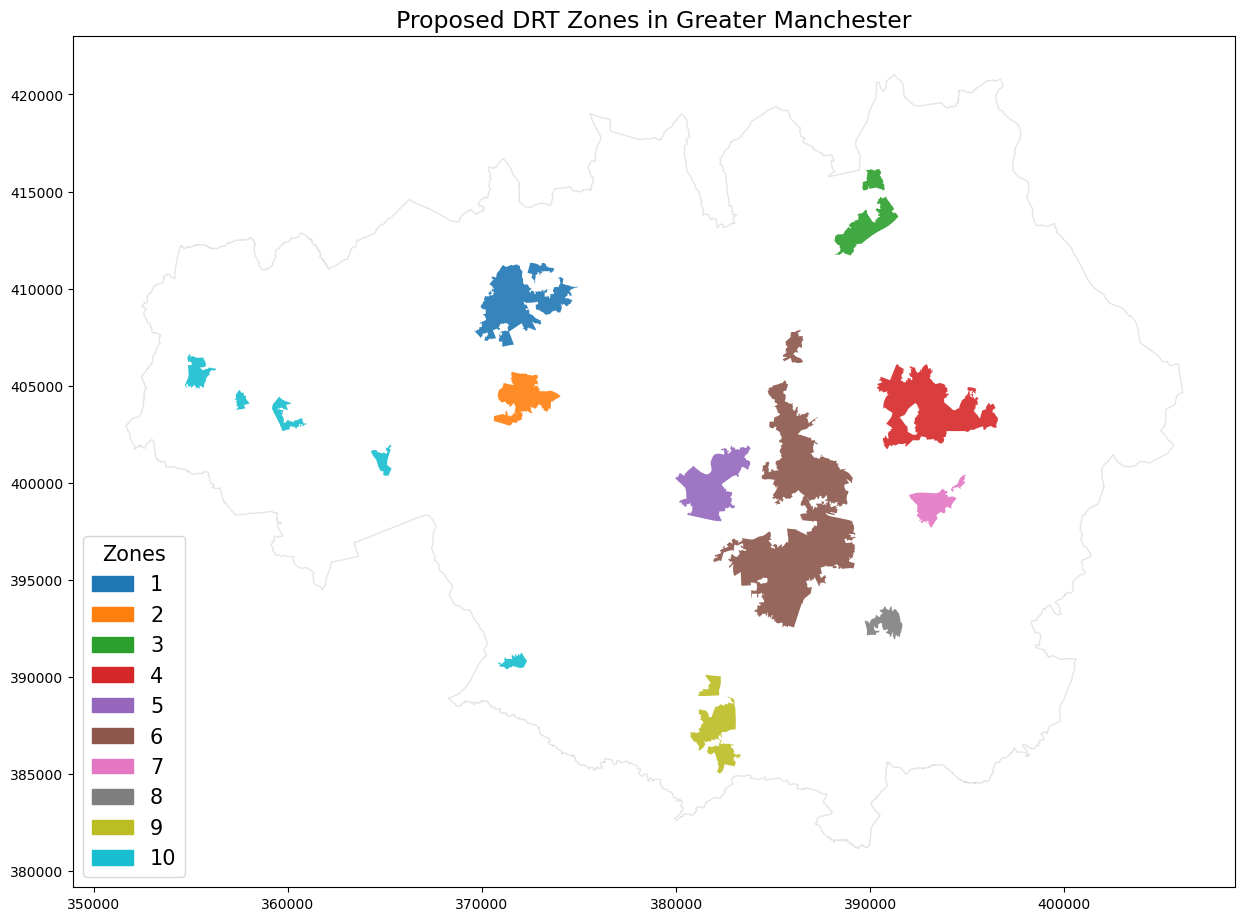

In [21]:
## Dissolve the lsoas into 10 zones
merged_proposed_zones = proposed_zones.dissolve(by='zones')
merged_proposed_zones.reset_index(inplace=True)

## Plot the merged zones
fig, ax = plt.subplots(figsize=(15, 15))
merged_proposed_zones.plot(ax=ax, column='zones', legend=False, cmap='tab10')
outline.plot(ax=ax, facecolor="white", alpha=0.1, edgecolor="black", linewidth=1)

categories = merged_proposed_zones['zones'].unique()
colors = plt.get_cmap('tab10')(range(len(categories)))
patches = [Patch(color=colors[i], label=category) for i, category in enumerate(categories)]

plt.legend(handles=patches, loc="lower left", title="Zones", fontsize=15, title_fontsize=15)
ax.set_title("Proposed DRT Zones in Greater Manchester", fontsize=17)
#ax.axis("off")

## Save the merged polygons to a new shapefile
#merged_proposed_zones.to_file("Data/Output/proposed_zones/zone_merged.shp")

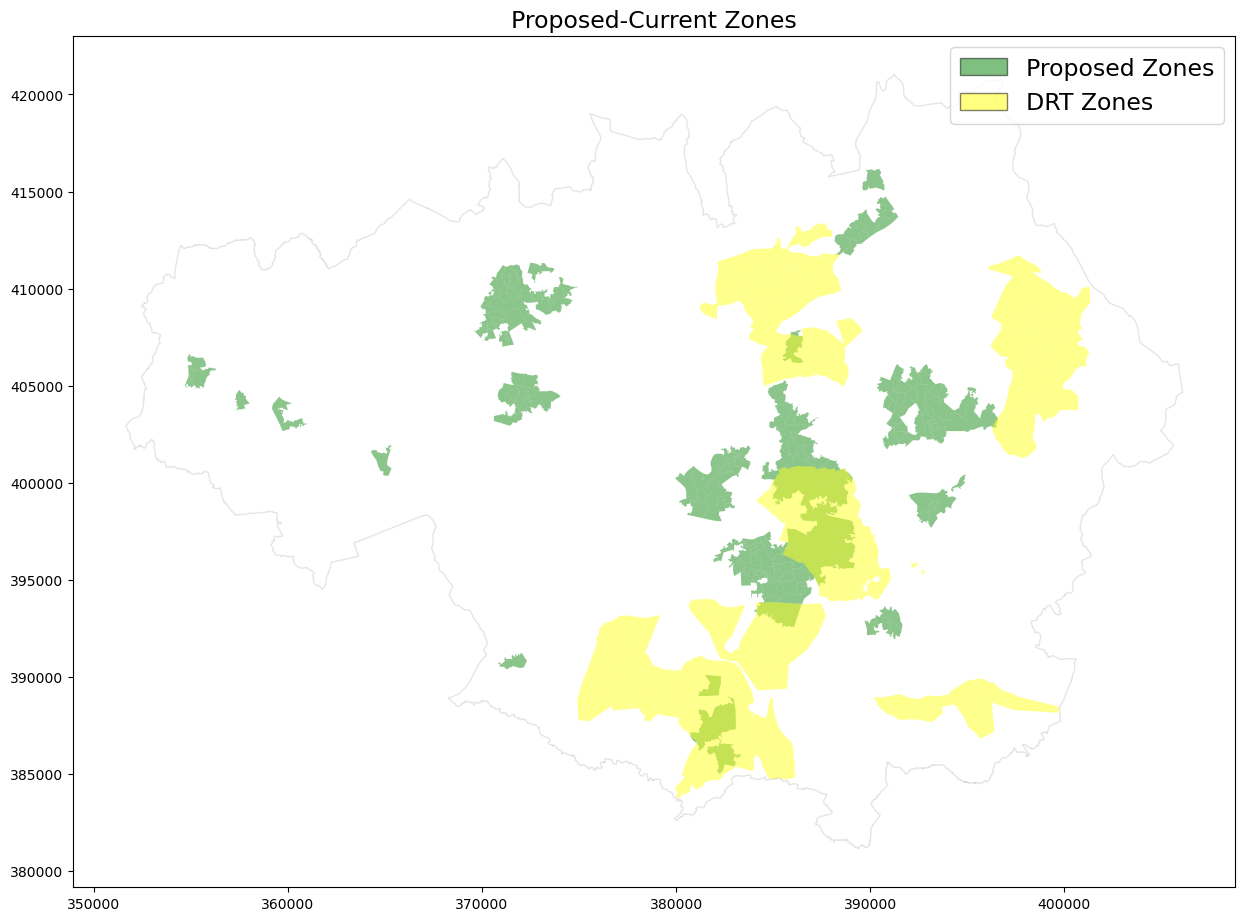

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))

proposed_zones.plot(ax=ax, facecolor="green", alpha=0.5, linewidth=0.5)
current_zones.plot(ax=ax, facecolor="yellow", alpha=0.5, linewidth=0.5)
outline.plot(ax=ax, facecolor="white", alpha=0.1, edgecolor="black", linewidth=1)

legend_elements=[
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Proposed Zones'),
    Patch(facecolor='yellow', edgecolor='black', alpha=0.5, label='DRT Zones'),
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=17)
#ax.axis("off")
plt.title("Proposed-Current Zones", fontsize=17)
plt.show()